In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns

from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

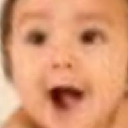

In [2]:
os.chdir('C:/Users/Rakshita Pawar/Emotion based Music Recommendation System/Age Detection/UTKFace')
im=Image.open('1_0_0_20161219154724341.jpg.chip.jpg').resize((128,128))
im

In [3]:
onlyfiles = os.listdir()

In [4]:
len(onlyfiles)

23708

In [5]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]

In [6]:
classes = []
for i in age:
    i = int(i)
    if i <= 12:
        classes.append(0)
    if (i>12) and (i<=19):
        classes.append(1)
    if (i>19) and (i<=40):
        classes.append(2)
    if (i>40) and (i<=60):
        classes.append(3)
    if (i>60):
        classes.append(4)
    

In [7]:
X_data =[]
for file in onlyfiles:
    face = misc.imread(file)
    face =cv2.resize(face, (32, 32) )
    X_data.append(face)

C:\Users\Rakshita Pawar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
X = np.squeeze(X_data)

In [9]:
X.shape

(23708, 32, 32, 3)

In [10]:
# normalize data
X = X.astype('float32')
X /= 255

In [11]:
classes[:10]

[2, 2, 4, 2, 2, 2, 1, 2, 2, 2]

In [12]:
categorical_labels = to_categorical(classes, num_classes=5)

In [13]:
categorical_labels[:10]

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [14]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

In [15]:
len(x_train)+len(x_test) + len(x_valid) == len(X)

True

In [27]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [28]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=25,
         validation_data=(x_valid, y_valid),)

Epoch 1/25
235/235 [==============================] - 49s 205ms/step - loss: 1.2708 - accuracy: 0.5363 - val_loss: 1.0082 - val_accuracy: 0.6129
Epoch 2/25
235/235 [==============================] - 35s 150ms/step - loss: 0.9801 - accuracy: 0.6331 - val_loss: 0.8525 - val_accuracy: 0.6713
Epoch 3/25
235/235 [==============================] - 37s 158ms/step - loss: 0.8749 - accuracy: 0.6700 - val_loss: 0.8213 - val_accuracy: 0.6861
Epoch 4/25
235/235 [==============================] - 37s 157ms/step - loss: 0.8436 - accuracy: 0.6828 - val_loss: 0.7778 - val_accuracy: 0.7033
Epoch 5/25
235/235 [==============================] - 37s 158ms/step - loss: 0.7984 - accuracy: 0.6997 - val_loss: 0.7740 - val_accuracy: 0.7106
Epoch 6/25
235/235 [==============================] - 36s 153ms/step - loss: 0.7777 - accuracy: 0.7016 - val_loss: 0.7507 - val_accuracy: 0.7097
Epoch 7/25
235/235 [==============================] - 36s 154ms/step - loss: 0.7870 - accuracy: 0.6982 - val_loss: 0.7311 - val_ac

In [45]:
%matplotlib inline 
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [30]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.751764714717865


In [41]:
labels =["Toddler",  # index 0
        "Teenagers", # index 1 
        "Adults", # index 2
         "old" ,#index3
         "very old"#index4
        ]

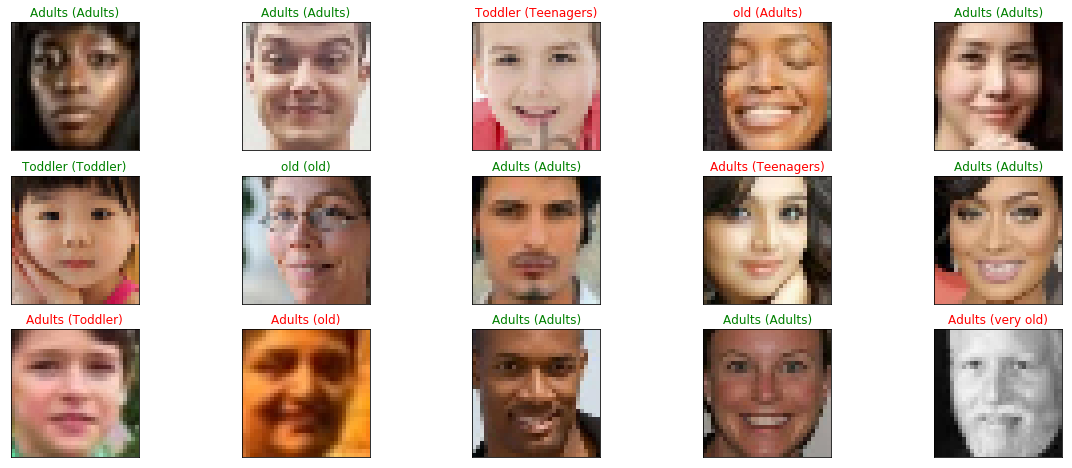

In [42]:
y_hat = model.predict(x_test)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [43]:
%matplotlib inline 
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [49]:
os.chdir('C:/Users/Rakshita Pawar/Emotion based Music Recommendation System/Age Detection')
model.save('model3.h5')